<a href="https://colab.research.google.com/github/Rams-TMP/weekly_incomes/blob/main/single_week_observation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyxlsb

#RUN

In [2]:
import pandas as pd
from pyxlsb import open_workbook
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
# Ruta al archivo Excel
file_path = 'Weekly Sheets 15.03.24.xlsb'

# Función para convertir el número de serie de Excel a fecha
def excel_date(num):
    return (datetime(1899, 12, 30) + timedelta(days=num)).date()

# Función para leer la hoja L-Sat
def read_l_sat(file_path):
    data = {}
    sales_data = []
    totals_data = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet('L-Sat') as sheet:
            for row in sheet.rows():
                # Leer celdas informativas para indentificar, primeras hojas
                if row[0].v == 'Week of:':
                    data['week_of'] = excel_date(row[2].v)
                if row[5] and row[5].v == 'Lunch - CASH':
                    data['session'] = 'Lunch'
                if row[18] and row [18].v == 'Lunch - CREDIT':
                    data['session'] = 'Lunch'
                if row[5] and row[5].v == 'Dinner - CASH':
                    data['session'] = 'Dinner'
                if row[18] and row [18].v == 'Dinner - CREDIT':
                    data['session'] = 'Dinner'
                # Leer celdas informativas para indentificar, resto de las hojas
                if row[0] and row[0].v == 'Lunch - CASH':
                    data['session'] = 'Lunch'
                if row[13] and row [13].v == 'Lunch - CREDIT':
                    data['session'] = 'Lunch'
                if row[0] and row[0].v == 'Dinner - CASH':
                    data['session'] = 'Dinner'
                if row[13] and row [13].v == 'Dinner - CREDIT':
                    data['session'] = 'Dinner'

                # Leer rango de datos de ventas
                if 3 <= row[0].r <= 37:
                    table_row = [cell.v for cell in row[:12]]
                    if any(cell is not None for cell in table_row):  # Omitir filas completamente vacías
                        sales_data.append(table_row)

                # Leer totales
                if 38 <= row[0].r <= 40:
                    total_row = [cell.v for cell in row[:12]]
                    if any(cell is not None for cell in total_row):  # Omitir filas completamente vacías
                        totals_data.append(total_row)
    # Asegurarse de que todas las claves esperadas estén presentes en el diccionario data
    if 'session' not in data:
        data['session'] = 'None'

    # Convertir los datos de ventas y totales a DataFrame
    df_sales = pd.DataFrame(sales_data, columns=['T/N', 'Cvrs', 'Bill N°', 'Kitchen', 'Unnamed', 'Bin N°', 'Wine', 'Liqueurs', 'Cigars', 'Bar', 'Total', 'Folio'])
    df_totals = pd.DataFrame(totals_data, columns=['T/N', 'Cvrs', 'Bill N°', 'Kitchen', 'Unnamed', 'Bin N°', 'Wine', 'Liqueurs', 'Cigars', 'Bar', 'Total', 'Folio'])

    return data, df_sales, df_totals

# Leer datos de la hoja L-Sat
data, df_sales, df_totals = read_l_sat(file_path)

In [4]:
# Función para leer una hoja específica
def read_sheet(file_path, sheet_name):
    data = {}
    sales_data = []
    totals_data = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_name) as sheet:
            for row in sheet.rows():
                # Leer celdas informativas
                # Leer celdas informativas para indentificar, primeras hojas
                if row[0].v == 'Week of:':
                    data['week_of'] = excel_date(row[2].v)
                if row[5] and row[5].v == 'Lunch - CASH':
                    data['session'] = 'Lunch'
                if row[18] and row [18].v == 'Lunch - CREDIT':
                    data['session'] = 'Lunch'
                if row[5] and row[5].v == 'Dinner - CASH':
                    data['session'] = 'Dinner'
                if row[18] and row [18].v == 'Dinner - CREDIT':
                    data['session'] = 'Dinner'
                # Leer celdas informativas para indentificar, resto de las hojas
                if row[0] and row[0].v == 'Lunch - CASH':
                    data['session'] = 'Lunch'
                if row[13] and row [13].v == 'Lunch - CREDIT':
                    data['session'] = 'Lunch'
                if row[0] and row[0].v == 'Dinner - CASH':
                    data['session'] = 'Dinner'
                if row[13] and row [13].v == 'Dinner - CREDIT':
                    data['session'] = 'Dinner'

                # Leer rango de datos de ventas
                if 3 <= row[0].r <= 37:
                    table_row = [cell.v for cell in row[:12]]
                    if any(cell is not None for cell in table_row):  # Omitir filas completamente vacías
                        sales_data.append(table_row)

                # Leer totales
                if 38 <= row[0].r <= 40:
                    total_row = [cell.v for cell in row[:12]]
                    if any(cell is not None for cell in total_row):  # Omitir filas completamente vacías
                        totals_data.append(total_row)

    # Asegurarse de que todas las claves esperadas estén presentes en el diccionario data
    if 'session' not in data:
        data['session'] = 'None'
    # Asegurarse de que todas las claves esperadas estén presentes en el diccionario data
    if 'week_of' not in data:
        data['week_of'] = 'None'

    # Convertir los datos de ventas y totales a DataFrame
    df_sales = pd.DataFrame(sales_data, columns=['T/N', 'Cvrs', 'Bill N°', 'Kitchen', 'Unnamed', 'Bin N°', 'Wine', 'Liqueurs', 'Cigars', 'Bar', 'Total', 'Folio'])
    df_totals = pd.DataFrame(totals_data, columns=['T/N', 'Cvrs', 'Bill N°', 'Kitchen', 'Unnamed', 'Bin N°', 'Wine', 'Liqueurs', 'Cigars', 'Bar', 'Total', 'Folio'])

    return data, df_sales, df_totals

# Leer datos de todas las hojas
sheet_names = ['L-Sat', 'D-Sat', 'L-Sun', 'L-Wed', 'D-Wed', 'L-Thu', 'D-Thu', 'L-Fri', 'D-Fri']
all_data = {}

for sheet_name in sheet_names:
    data, df_sales, df_totals = read_sheet(file_path, sheet_name)
    all_data[sheet_name] = {'data': data, 'df_sales': df_sales, 'df_totals': df_totals}

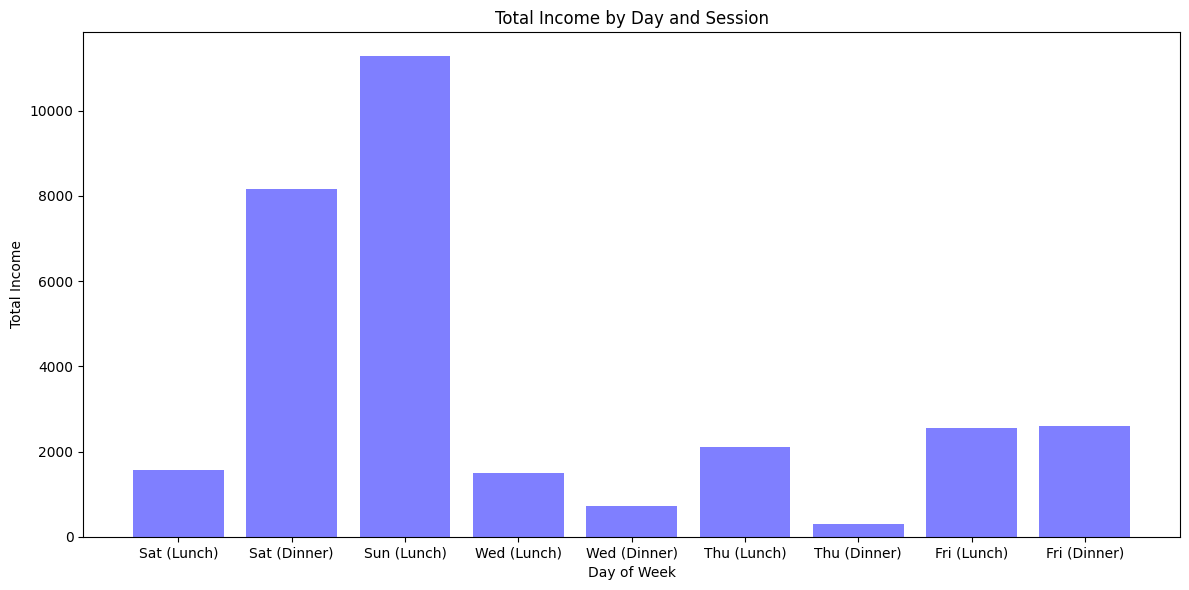

In [5]:
# Crear una figura y ejes para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre los datos de cada hoja y graficar los ingresos totales por día y sesión
for sheet_name, sheet_data in all_data.items():
    # Obtener datos relevantes
    df_totals = sheet_data['df_totals']

    # Filtrar el DataFrame para excluir la última fila (fila con índice -1)
    df_totals_filtered = df_totals.iloc[:-1]

    session_type = sheet_data['data']['session']  # Obtener el tipo de sesión (Lunch, Dinner, etc.)
    day_of_week = sheet_name.split('-')[1]  # Obtener el día de la semana

    # Verificar el tipo de sesión
    if session_type == 'Lunch':
        total_sales = df_totals_filtered['Total'].sum()
    elif session_type == 'Dinner':
        total_sales = df_totals_filtered['Total'].sum()
    else:
        total_sales = 0  # O cualquier manejo que desees para otro tipo de sesiones

    # Graficar los totales
    ax.bar(day_of_week + ' (' + session_type + ')', total_sales, color='blue', alpha=0.5)

# Personalizar la gráfica
ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Income')
ax.set_title('Total Income by Day and Session')

# Mostrar la gráfica
plt.tight_layout()
plt.show()